# Importación de librerias

In [14]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy.stats import levene




# Analisis exploratorio de datos


## Carga de datasets

In [15]:
#Se cargan datasets

cantidad_viajes = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')

promedio_viajes_barrio = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv")

viajes_aeropuerto = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv")



Respuesta estudiante.
 El proyecto fue hecho localmente en vscode por lo que por eso se tenia los directorios de la primera forma, se edita poniendo el url para no tener problemas

## Procesamiento de datos y analisis

In [16]:
cantidad_viajes.info()

cantidad_viajes.head()
print('Duplicados')
print(cantidad_viajes.duplicated().sum())

print('Valores nulos')
print(cantidad_viajes.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
Duplicados
0
Valores nulos
0


In [17]:
cantidad_viajes.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


En este dataset nos da la cantidad de viajes por compania, la media se puede ver que es muy diferente al promedio por lo podriamos decir de primera instancia que la distribucion no tiene un comportamiento de normalidad, esto puede ser por que las companias de taxis son eventos independientes y no uno solo

In [18]:
promedio_viajes_barrio.info()

promedio_viajes_barrio.head()

print('Duplicados')
print(promedio_viajes_barrio.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
Duplicados
0


In [19]:
promedio_viajes_barrio.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


El data set de tiempo promedio de tiempo para cada barrio, aqui se puede ver que la media y la mediana son bastantes distintas ya que los datos no es de un evento o un barrio en especifico sino de varios que son independientes uno del otro

In [20]:
viajes_aeropuerto.info()

viajes_aeropuerto.head()

print('Duplicados')
print(promedio_viajes_barrio.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
Duplicados
0


In [21]:
viajes_aeropuerto.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


En el dataset de duracion de el barrio loop al aeropuerto se puede ver que tienda a una distribucion normal de primera instancia ya que la media y la mediana son muy parecidas, ademas el contexto es que se esta yendo a un mismo lugar en especifico por lo que no habria mucha variacion

In [22]:
#Se cambia el tipo de dato en columna start_ts a tipo date
viajes_aeropuerto['start_ts'] = pd.to_datetime(viajes_aeropuerto['start_ts'])

viajes_aeropuerto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Se revisan los datastes para ver si hay alguna tipo de dato incorrecto y datos duplicados, al chechar se que no hay datos duplicados y tampoco nulos(Las entradas coinciden la cantidad de non-null), sin embargo el unico detalle es que se ve que en el de los viajes a aeropuerto la columna start_ts esta en object por lo que se transforma a tipo date

Respuesta del estudiante.

Se exploran las primeras filas con head() en los datasets.

Se utiliza describe para ver informacion general de los datasets y se hace una breve descripcion

Se revisan los datos duplicados y se agrega descripcion acerca de los datos nulos

## Identificación de los 10 principales barrios en términos de finalización del recorrido


In [23]:
#Se realiza un una lista del top de los barrios con mayor promedio de tiempo

top10barrios = promedio_viajes_barrio.sort_values(by='average_trips', ascending=False)

top10barrios.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Grafico 10 principales barrios y descripción

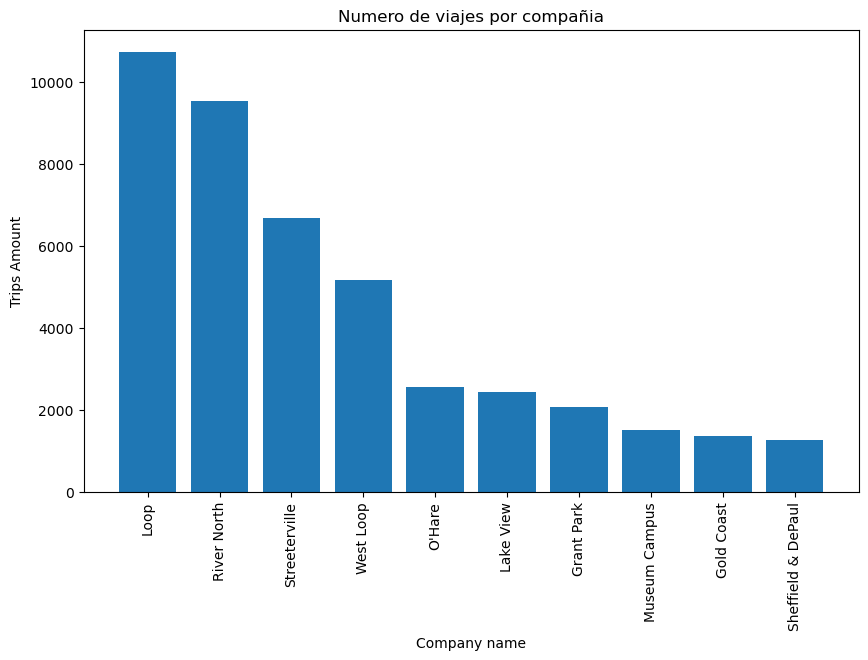

In [24]:
#los 10 barrios principales por número de finalizaciones grafico

top_10_barrios = promedio_viajes_barrio.nlargest(10, 'average_trips')
grafico_barrios = top_10_barrios.sort_values(by='average_trips', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(grafico_barrios['dropoff_location_name'], grafico_barrios['average_trips'])
plt.title('Numero de viajes por compañia')
plt.xlabel('Company name')
plt.ylabel('Trips Amount')
plt.xticks(rotation=90)
plt.show()


 Dentro del top 10 de barrios que mas se terminaron viajes esta Loop con 10727, river north con 9523, Streeterville 6664 y West Loop con 5163, mientras que los demas estan abajo de los 3000 viajes finalizados


# Empresas de taxis y número de viajes

                            company_name  trips_amount
0                              Flash Cab         19558
1              Taxi Affiliation Services         11422
2                       Medallion Leasin         10367
3                             Yellow Cab          9888
4        Taxi Affiliation Service Yellow          9299
5              Chicago Carriage Cab Corp          9181
6                           City Service          8448
7                               Sun Taxi          7701
8              Star North Management LLC          7455
9      Blue Ribbon Taxi Association Inc.          5953
10               Choice Taxi Association          5015
11                            Globe Taxi          4383
12             Dispatch Taxi Affiliation          3355
13             Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Associat          2235
15              Checker Taxi Affiliation          2216
16                          Blue Diamond          2070
17        

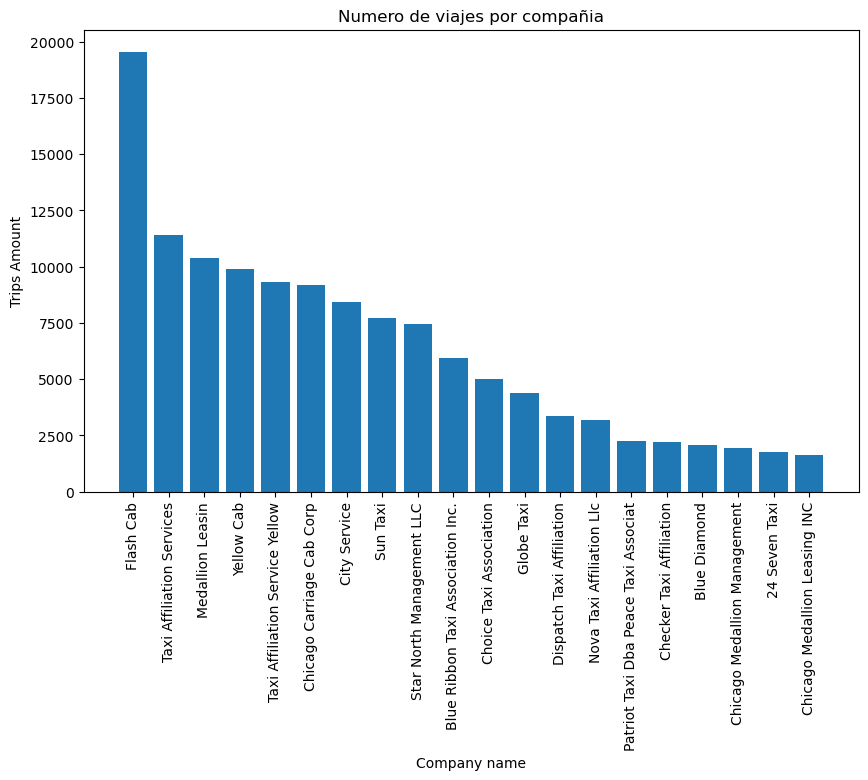

In [25]:
# Se realiza top 20 de empresas con mas numero de viajes y graficas

top_20 = cantidad_viajes.nlargest(20, 'trips_amount')
print(top_20.head(20))
grafico_viajes_compania = top_20.sort_values(by='trips_amount')

plt.figure(figsize=(10, 6))
plt.bar(top_20['company_name'], top_20['trips_amount'])
plt.title('Numero de viajes por compañia')
plt.xlabel('Company name')
plt.ylabel('Trips Amount')
plt.xticks(rotation=90)
plt.show()

Las empresas mas populares son Flash Cab con 19558 viajes, Taxi Affiliation Services con 11422, Medallion Leasin con 10367 y Yelllow Cab con 9888, mientras que las demas compañias cuentan con menos de 9300 viajes


# La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos?.

Se declara la hipotesis nula y alternartiva con un alfa del .05% para saber si hay diferencia significativa entre la duración de días buenos y días lluviosos

H0 Días buenos = Días malos
H1: Días buenos =/= Días malos 

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64



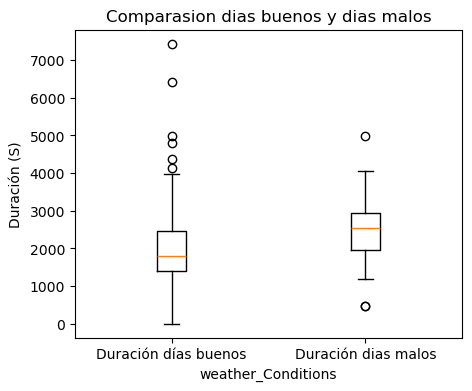

Levene's test statistic: 0.38853489683656073
p-value: 0.5332038671974493
No se puede rechazar la hipotesis nula, varianzas no son significativamente diferentes

valor p: 6.517970327099473e-12
Rechazamos la hipotesis nula


In [26]:
#Se realiza describe de cada condicion de clima ver sus datos generales

duracion_dias_buenos = viajes_aeropuerto[viajes_aeropuerto['weather_conditions'] == 'Good']['duration_seconds']
print(duracion_dias_buenos.describe())
print()

duracion_dias_malos = viajes_aeropuerto[viajes_aeropuerto['weather_conditions'] == 'Bad']['duration_seconds']
print(duracion_dias_malos.describe())
print()


plt.figure(figsize=(5, 4))
plt.boxplot([duracion_dias_buenos, duracion_dias_malos], labels=['Duración días buenos', 'Duración dias malos'])
plt.xlabel('weather_Conditions')
plt.ylabel('Duración (S)')
plt.title('Comparasion dias buenos y dias malos')
plt.show()  

#Realizamos levene test para confirmar que nuestras varianzas sean iguales antes de hacer el ttest de medias
statistic, p_value = levene(duracion_dias_buenos, duracion_dias_malos)

print("Levene's test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipotesis nula, varianzas son significativamente diferentes.")
else:
    print("No se puede rechazar la hipotesis nula, varianzas no son significativamente diferentes")

print()

#Procedemos con ttest
alpha = .05

results = st.ttest_ind(duracion_dias_buenos, duracion_dias_malos, equal_var=True)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No hay suficiente evidencia para rechazar la hipotesis nula')
                                        


Se obtiene in pvalue de 6.51e-12 menor a alpha de .05 por lo que existe suficiente prueba estadistica para rechazar H0(hipotesis nula), es decir que la duración de viajes en dia buenos vs la duración de viajes en dias malos son diferentes, siendo que en los días buenos se los viajes son menos tardados al contrario de los días malos

# Conclusión

En conclusión se puede decir que los barrios donde más viajes se hacen es en Loop y River North pues quizas estas sean las de mayor población para que esto suceda, a su vez la compañia que más viajes hace es Flash Cab, también nos pudimos percatar mediante la prueba de hipotesis que si hay una diferencia significativa entre los viajes que se hacen en dias soleados y en días lluviosos siendo los de días lluviosos los que toman más tiempo.

Se tendria que hacer un analisis a fondo del porque ciertos barrios tienen mas viajes que otros, pudiendo ser la población, el poder adqusitivo de la gente, etc y así quizas hacer ofertas especiasles para los que vayan a esos barrios y atraer más gente, por ende al tener más cantidad de gente hace que valga la pena ofrecerles dicho plan

En tanto a la compañias Flash Cab se debe de hacer un tipo benchmarking para ver que esta ofreciendo que las otras compañias no para que esta fuese tan popular.

En cuanto a la ruta de loop hacia al aeropuerto podríamos hacer un estudio de cuanto estan cobrando las compañias lideres por el tiempo que tardan en días lluviosos y dias normales en la ruuta hacia al aeropuerto pudiendo hacer una mejor oferta que la competencia en cuanto a tarifa se refiere

